In [80]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 

# Debido a que necesitamos que existe un solo agente por celda, elegimos ''SingleGrid''.
from mesa.space import MultiGrid

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

from mesa.time import SimultaneousActivation

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

import random

In [81]:
class CleaningAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.position = np.array((1,1), dtype = np.float64)
        self.next_state = None

    def step(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False,
            radius = 1)
            
        empty_cells = [cell for cell in possible_steps if self.model.grid.is_cell_empty(cell)]
                
        current_cell = self.pos

        if(self.model.grid[current_cell].dirty == 1 ):
            self.clean
            self.next_state = self.random.choice(empty_cells)
            self.model.grid.move_agent(self, self.next_state)

        else:
            self.next_state = self.random.choice(empty_cells)
            self.model.grid.move_agent(self, self.next_state)

    def advance(self):
        self.position = self.next_state

    def clean():
        #something 
    


In [82]:
def get_grid(model):
    grid_dtype = [('agent_id', int), ('dirty', int)]
    grid = np.zeros((model.grid.width, model.grid.height), dtype=grid_dtype)

    for (agent, (x, y)) in model.grid.coord_iter():
        grid[x][y]['agent_id'] = agent.unique_id

    for x in range(model.grid.width):
        for y in range(model.grid.height):
            grid[x][y]['dirty'] = model.grid[x][y].get('dirty', 0)

    return grid

In [97]:
class CleaningModel(Model):
    def __init__ (self, width, height, num_agents, dirty_percent = 0.9):
        self.num_agents = num_agents
        self.grid = MultiGrid(width, height, torus = False)
        self.schedule = SimultaneousActivation(self)
        self.datacollector = DataCollector(model_reporters={"Grid": get_grid})
        self.dirty_key = 'dirty'
        
        dirty_cells = int (width*height* dirty_percent)
        

        id = 0
        for i in range(1, (num_agents + 1)):
                agent = CleaningAgent(id, self)
                self.grid.place_agent(agent, (1, 1))
                self.schedule.add(agent)
                id = id + 1

        for i in range(1, dirty_cells+1):
            x, y = random.randrange(self.grid.width), random.randrange(self.grid.height)
            while not self.grid.is_cell_empty((x, y)):
                # Regenerate random coordinates until an empty cell is found
                x, y = random.randrange(self.grid.width), random.randrange(self.grid.height)
                self.grid[x][y].set(self.dirty_key, 1)
              

def step(self):
        """ Ejecuta un paso de la simulación."""
        self.datacollector.collect(self)
        self.schedule.step()

In [98]:
WIDTH = 100
HEIGHT = 100
DIRTY_PERCENTAGE = 0.9
NUM_AGENTS = 2
# Definimos el número máximo de generaciones a correr
MAX_STEPS = 10

# Registramos el tiempo de inicio y ejecutamos la simulación
start_time = time.time()
model = CleaningModel(WIDTH, HEIGHT, NUM_AGENTS, DIRTY_PERCENTAGE)
for i in range(MAX_STEPS):
    model.step()
    
# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))

Tiempo de ejecución: 0:00:00.034346


In [ ]:
all_grid = model.datacollector.get_model_vars_dataframe()

IndexError: single positional indexer is out-of-bounds

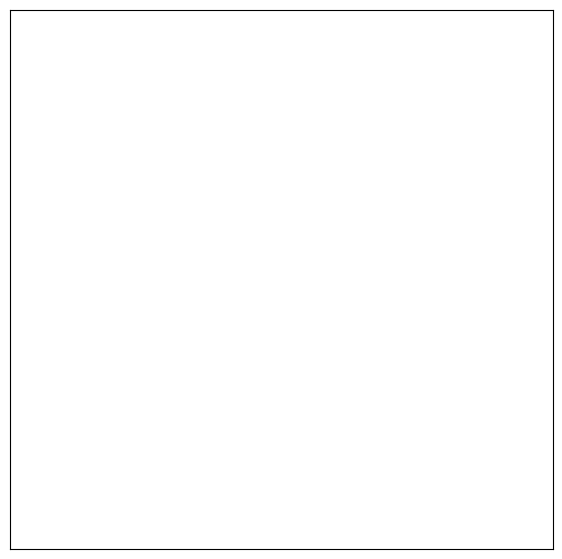

In [ ]:
# Graficamos la información usando `matplotlib`
# %%capture

fig, axs = plt.subplots(figsize=(7,7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames=MAX_STEPS)